 **Implementing PCA without library function**

Implementing PCA on Healthcare [Healthcare Coverage](https://www.kaggle.com/hhs/health-insurance) rates provided by US department of Health and Human services

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

**1.Importing Data**

In [ ]:
filepath = '../input/health-insurance/states.csv'
data = pd.read_csv(filepath)


and Our Data consist of -

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
dropped_data = data.drop(columns=['Medicaid Enrollment (2013)','Medicaid Enrollment (2016)', 'Medicaid Enrollment Change (2013-2016)', 'Medicare Enrollment (2016)'])

In [ ]:
for col in dropped_data.columns:
    print(col, '--')
    print(dropped_data[col].value_counts())
    print('---')

In [ ]:
## Needed numerical Values : 
num_attributes = ['Uninsured Rate Change (2010-2015)', 'Health Insurance Coverage Change (2010-2015)', 'Marketplace Health Insurance Coverage (2016)', 'State Medicaid Expansion (2016)']

# If you want to visualize/work with 3 attributes uncomment the lines below 
# num_attributes = ['Uninsured Rate Change (2010-2015)', 'Health Insurance Coverage Change (2010-2015)', 'Marketplace Health Insurance Coverage (2016)']

num_data = dropped_data[num_attributes]
num_data.head()
print(num_data.info())



**To convert String data in  Uninsured Rate change (2010-2015) to Float in the below code cell.**


In [ ]:
from sklearn import preprocessing

def convert(data):
    number = preprocessing.LabelEncoder()
    data['Uninsured Rate Change (2010-2015)'] = number.fit_transform(data['Uninsured Rate Change (2010-2015)'])
    data=data.fillna(0.00) # fill holes with default value
    return data


num_data = convert(num_data)

**2. Plotting Data in 3D**

graph with 3D scatter plots

In [ ]:


from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter3D(num_data['Uninsured Rate Change (2010-2015)'], num_data['Health Insurance Coverage Change (2010-2015)'], num_data['Marketplace Health Insurance Coverage (2016)'])

plt.show()



**3. Scalling Attributes**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_num_data = StandardScaler().fit_transform(num_data) 

In [ ]:
mean_data = np.mean(scaled_num_data, axis=0)

**4.Computing co-Varience Matrix**

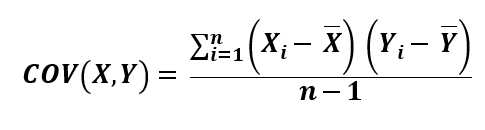

In [ ]:
cov_matrix = (scaled_num_data - mean_data).T.dot(scaled_num_data - mean_data) / (scaled_num_data.shape[0]-1)

In [ ]:


# Computing eigen values and vectors 

eig_values, eig_vectors = np.linalg.eig(cov_matrix)

print('Eigen values: --', eig_values)
print('Eigen vectors: --', eig_vectors)



In [ ]:
eig_pairs = [(eig_values[i], eig_vectors[:, i]) for i in range(len(eig_values))]
eig_pairs.sort(key = lambda x:x[0], reverse=True)
eig_pairs

**5. Estimating Importance of each Vector**

In [ ]:


total = sum(eig_values)
var_spread = [(i/total)*100 for i in sorted(eig_values, reverse=True)]
cum_var_spread = np.cumsum(var_spread)
print(cum_var_spread)

# x_coordinates = ['PC1', 'PC2', 'PC3'] for working with 3 attributes
x_coordinates = ['PC1', 'PC2', 'PC3', 'PC4']

y_pos = np.arange(len(x_coordinates))
plt.ylabel('Variance spread in %')
plt.xticks(y_pos, x_coordinates)
plt.bar(y_pos, var_spread)
plt.plot(cum_var_spread, 'r')
plt.show()



In [ ]:
threshold = 90

# If you're working with three attributes
# threshold = 88 
 
keeping_vec = 0
for index, percentage in enumerate(cum_var_spread):
    if percentage > threshold:
        keeping_vec = index +1 
        break

print("We keep ", keeping_vec, " vectors")

In [ ]:
num_features = scaled_num_data.shape[1]

projection_mat = eig_pairs[0][1].reshape(num_features, 1)

**6.Projection Matrix**

In [ ]:
for eig_vec_idx in range(1, keeping_vec):
    projection_mat = np.hstack((projection_mat, eig_pairs[eig_vec_idx][1].reshape(num_features, 1)))

In [ ]:
PCA_data = scaled_num_data.dot(projection_mat)

PCA_data

In [ ]:
plt.scatter(PCA_data[:, 0], PCA_data[:, 1])